In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

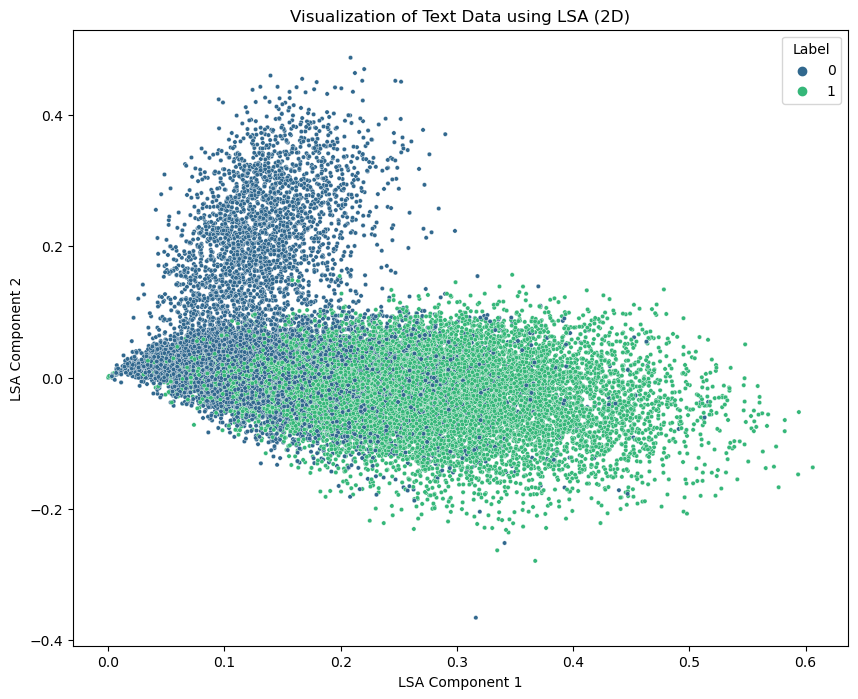

In [2]:
file_path = 'G:\projectMachineLearningTest\data\cleaned_mhc.csv'
data = pd.read_csv(file_path)

tfidf_vectorizer = TfidfVectorizer(max_features=3500)
tfidf_data = tfidf_vectorizer.fit_transform(data['text'])

lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_data = lsa.fit_transform(tfidf_data)

lsa_2d = TruncatedSVD(n_components=2, random_state=42)
lsa_data_2d = lsa_2d.fit_transform(tfidf_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=lsa_data_2d[:, 0], y=lsa_data_2d[:, 1], hue=data['label'], palette='viridis', s=10)
plt.title('Visualization of Text Data using LSA (2D)')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')
plt.legend(title='Label')
plt.show()

In [3]:
y = data['label']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_data, y, test_size=0.2, random_state=42)
X_train_lsa, X_test_lsa, _, _ = train_test_split(lsa_data, y, test_size=0.2, random_state=42)


svm_rbf_model = SVC(kernel='rbf', random_state=42)
svm_rbf_model.fit(X_train_tfidf, y_train)
y_pred_tfidf_svm_rbf = svm_rbf_model.predict(X_test_tfidf)

print("SVM (RBF kernel) with original data:")
print(classification_report(y_test, y_pred_tfidf_svm_rbf))

svm_rbf_model.fit(X_train_lsa, y_train)
y_pred_lsa_svm_rbf = svm_rbf_model.predict(X_test_lsa)

print("SVM (RBF kernel) with LSA data:")
print(classification_report(y_test, y_pred_lsa_svm_rbf))

SVM (RBF kernel) with original data:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2099
           1       0.93      0.93      0.93      2549

    accuracy                           0.92      4648
   macro avg       0.92      0.92      0.92      4648
weighted avg       0.92      0.92      0.92      4648

SVM (RBF kernel) with LSA data:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2099
           1       0.92      0.92      0.92      2549

    accuracy                           0.91      4648
   macro avg       0.91      0.91      0.91      4648
weighted avg       0.91      0.91      0.91      4648

